### Imports

In [90]:
import sqlite3
import pandas as pd
from sqlite3 import Error
import numpy as np
import matplotlib.pyplot as plt

### Helper Functions

In [2]:
def create_conn(db):
    """
    Takes in the name for a database and creates a 
    connection to the SQLite database and then 
    returns it.
    """
    conn = None
    try:
        conn = sqlite3.connect(db)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

In [3]:
def create_table(conn, create_table_sql):
    """
    Takes in the connection to the database conn and
    a create table SQL query to create a table in the
    SQLite database.
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

In [4]:
def insert_statement(insert_data, conn, table_name):
    """
    Takes in the connection to the database conn,
    the name of the table table_name that we are
    working with, and the stripped data to insert
    into the table insert_data.
    """
    with conn:
        cur = conn.cursor()

        empty_value_container = "?,"*len(insert_data[0])
        empty_value_container = "".join(["(",empty_value_container.strip(","),")"])

        cur.executemany(f"INSERT INTO {table_name} VALUES {empty_value_container}", insert_data)

In [5]:
def read_query(query, conn):
    """
    Takes in the connection to the database conn,
    and the query to execute on the data.
    """
    result = pd.read_sql_query(query, conn)
    return result

### Setting up SQL database

In [6]:
database_filename = 'f1_eda.db'
conn = create_conn(database_filename)

In [7]:
with open("constructors.csv","r") as f:
    data = f.read().strip().split("\n")

data = list(map(lambda row: row.split(","), data))
columns = data[0]

constructor_index = columns.index("constructorId")
name_index = columns.index("name")

constructorId = list(map(lambda row: int(row[constructor_index]), data[1:]))
name = list(map(lambda row: row[name_index].strip('"'), data[1:]))

insert_data = list(zip(constructorId,name))
    
sql_create_statement = """CREATE TABLE constructors
                        (
                            constructorId Integer not null Primary key,
                            name Text not null
                        )
                        """

create_table(conn, sql_create_statement)

insert_statement(insert_data, conn, "constructors")

In [11]:
with open("constructor_standings.csv","r") as f:
    data = f.read().strip().split("\n")

data = list(map(lambda row: row.split(","), data))

columns = data[0]

constructorStandingsId_index = columns.index("constructorStandingsId")
raceId_index = columns.index("raceId")
constructorId_index = columns.index("constructorId")
points_index = columns.index("points")
position_index = columns.index("position")

constructorStandingsId = list(map(lambda row: int(row[constructorStandingsId_index]), data[1:]))
raceId = list(map(lambda row: int(row[raceId_index]), data[1:]))
constructorId = list(map(lambda row: int(row[constructorId_index]), data[1:]))
points = list(map(lambda row: float(row[points_index]), data[1:]))
position = list(map(lambda row: int(row[position_index]), data[1:]))

insert_data = list(zip(constructorStandingsId, raceId, constructorId, points, position))

sql_create_statement = """CREATE TABLE constructor_standings
                    (                           
                        constructorStandingsId Integer not null Primary key,
                        raceId Integer not null,
                        constructorId not null,
                        points Integer not null,
                        position Integer not null
                    )
                    """

create_table(conn, sql_create_statement)

insert_statement(insert_data, conn, "constructor_standings")

In [12]:
with open("drivers.csv","r") as f:
    data = f.read().strip().split("\n")

data = list(map(lambda row: row.split(","), data))

columns = data[0]

driverId_index = columns.index("driverId")
forename_index = columns.index("forename")
surname_index = columns.index("surname")

driverId = list(map(lambda row: int(row[driverId_index]), data[1:]))
name = list(map(lambda row: " ".join([row[forename_index].strip('"'),row[surname_index].strip('"')]) , data[1:]))

insert_data = list(zip(driverId, name))

sql_create_statement = """CREATE TABLE drivers
                    (
                        driverId Integer not null Primary key,
                        name Text not null
                    )
                    """
create_table(conn, sql_create_statement)

insert_statement(insert_data, conn, "drivers")

In [13]:
with open("races.csv","r") as f:
    data = f.read().strip().split("\n")

data = list(map(lambda row: row.split(","), data))

columns = data[0]

raceId_index = columns.index("raceId")
year_index = columns.index("year")
round_index = columns.index("round")

raceId = list(map(lambda row: int(row[raceId_index]), data[1:]))
year = list(map(lambda row: int(row[year_index]), data[1:]))
race_num = list(map(lambda row: int(row[round_index]), data[1:]))

insert_data = list(zip(raceId, year, race_num))

sql_create_statement = """CREATE TABLE races
                    (
                        raceId Integer not null Primary key,
                        year Integer not null,
                        round Integer not null
                    )
                    """

create_table(conn, sql_create_statement)
insert_statement(insert_data, conn, "races")

In [14]:
with open("status.csv","r") as f:
    data = f.read().strip().split("\n")

data = list(map(lambda row: row.split(","), data))

columns = data[0]

statusId_index = columns.index("statusId")
status_index = columns.index("status")

statusId = list(map(lambda row: int(row[statusId_index]), data[1:]))
status = list(map(lambda row: row[status_index].strip('"'), data[1:]))

insert_data = list(zip(statusId, status))

sql_create_statement = """CREATE TABLE status
                    (
                        statusId Integer not null Primary key,
                        status Text not null
                    )
                    """

create_table(conn, sql_create_statement)
insert_statement(insert_data, conn, "status")

In [15]:
with open("results.csv","r") as f:
    data = f.read().strip().split("\n")

data = list(map(lambda row: row.split(","), data))

columns = data[0]

resultId_index = columns.index("resultId")
raceId_index = columns.index("raceId")
driverId_index = columns.index("driverId")
constructorId_index = columns.index("constructorId")
grid_index = columns.index("grid")
position_index = columns.index("position")
points_index = columns.index("points")
statusId_index = columns.index("statusId")

resultId = list(map(lambda row: int(row[resultId_index]), data[1:]))
raceId = list(map(lambda row: int(row[raceId_index]), data[1:]))
driverId = list(map(lambda row: int(row[driverId_index]), data[1:]))
constructorId = list(map(lambda row: int(row[constructorId_index]), data[1:]))
grid = list(map(lambda row: int(row[grid_index]), data[1:]))
position = list(map(lambda row: row[position_index], data[1:]))
points = list(map(lambda row: float(row[points_index]), data[1:]))
statusId = list(map(lambda row: int(row[statusId_index]), data[1:]))
position = list(map(lambda val: '1000' if val=="\\N" else val, position))
position = list(map(lambda val: int(val), position))

insert_data = list(zip(resultId, raceId, driverId, constructorId, grid, position, points, statusId))

result_df = pd.DataFrame(insert_data, columns=["resultId","raceId","driverId","constructorId","grid","position","points","statusId"])

grouped=result_df.groupby(by='raceId')['position']
values=grouped.transform(lambda x: len(x))
indices_to_replace=result_df[result_df.position==1000].index.tolist()
values_to_replace=values[indices_to_replace]
result_df['position'].iloc[indices_to_replace]=values_to_replace

insert_data = result_df.values

sql_create_statement = """CREATE TABLE results
                    (
                        resultId Integer not null Primary key,
                        raceId Integer not null,
                        driverId Integer not null,
                        constructorId Integer not null,
                        grid Integer not null,
                        position Integer not null,
                        points Real not null,
                        statusId Integer not null
                    )
                    """
create_table(conn, sql_create_statement)
insert_statement(insert_data, conn, "results")

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [16]:
with open("lap_times.csv","r") as f:
    data = f.read().strip().split("\n")

data = list(map(lambda row: row.split(","), data))

columns = data[0]

raceId_index = columns.index("raceId")
driverId_index = columns.index("driverId")
lap_index = columns.index("lap")
milliseconds_index = columns.index("milliseconds")

raceId = list(map(lambda row: int(row[raceId_index]), data[1:]))
driverId = list(map(lambda row: int(row[driverId_index]), data[1:]))
lap = list(map(lambda row: int(row[lap_index]), data[1:]))
milliseconds = list(map(lambda row: int(row[milliseconds_index]), data[1:]))
lapId = list(range(1, len(raceId)+1))

insert_data = list(zip(lapId, raceId, driverId, lap, milliseconds))

sql_create_statement = """CREATE TABLE lap_times
                    (
                        lapId Integer not null Primary key,
                        raceId Integer not null,
                        driverId Integer not null,
                        lap Integer not null,
                        milliseconds Integer not null
                      )
                    """

create_table(conn, sql_create_statement)
insert_statement(insert_data, conn, "lap_times")

In [18]:
with open("pit_stops.csv","r") as f:
    data = f.read().strip().split("\n")

data = list(map(lambda row: row.split(","), data))

columns = data[0]

raceId_index = columns.index("raceId")
driverId_index = columns.index("driverId")
stop_index = columns.index("stop")
lap_index = columns.index("lap")
milliseconds_index = columns.index("milliseconds")
raceId = list(map(lambda row: int(row[raceId_index]), data[1:]))
driverId = list(map(lambda row: int(row[driverId_index]), data[1:]))
stop = list(map(lambda row: int(row[stop_index]), data[1:]))
lap = list(map(lambda row: int(row[lap_index]), data[1:]))
milliseconds = list(map(lambda row: int(row[milliseconds_index]), data[1:]))
pit_stop_Id = list(range(1, len(raceId)+1))
insert_data = list(zip(pit_stop_Id, raceId, driverId, stop, lap, milliseconds))

sql_create_statement = """CREATE TABLE pit_stops
                    (
                        pit_stop_Id Integer not null Primary key,
                        raceId Integer not null,
                        driverId Integer not null,
                        stop Integer not null,
                        lap Integer not null,
                        milliseconds Integer not null
                    )
                    """
    
create_table(conn, sql_create_statement)
insert_statement(insert_data, conn, "pit_stops")

### EDA

In [21]:
query_statement = """
                select year, constructors.name from constructor_standings
                    join
                        (
                            select year, raceId from races
                            group by year
                            having max(round)                       
                        ) as last_race
                            on last_race.raceId = constructor_standings.raceId                        
                    join constructors
                        on constructor_standings.constructorId=constructors.constructorId                
                where position=1                
                order by year
            """
result = read_query(query_statement, conn)

In [31]:
result.name.value_counts()

Ferrari          16
Williams          9
McLaren           8
Mercedes          7
Red Bull          4
Team Lotus        4
Renault           2
Cooper-Climax     2
Brabham-Repco     2
Lotus-Climax      2
Tyrrell           1
Lotus-Ford        1
Benetton          1
Brawn             1
BRM               1
Matra-Ford        1
Vanwall           1
Name: name, dtype: int64

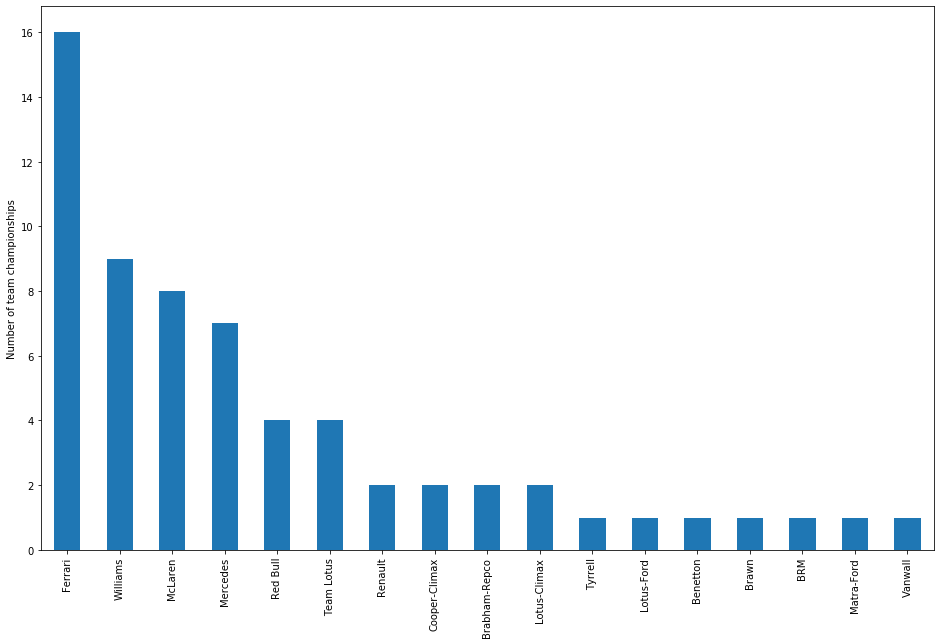

In [41]:
fig, ax = plt.subplots(figsize=(16, 10))

result.name.value_counts().plot.bar(ax=ax)
ax.set_ylabel("Number of team championships")
plt.savefig('historic_champions.svg')

In [45]:
result[(result.year>2009) & (result.year<2021)]

,year,name
52,2010,Red Bull
53,2011,Red Bull
54,2012,Red Bull
55,2013,Red Bull
56,2014,Mercedes
57,2015,Mercedes
58,2016,Mercedes
59,2017,Mercedes
60,2018,Mercedes
61,2019,Mercedes


In [47]:
query_statement = """
                select last_race.year, constructors.name, position from constructor_standings                
                    join
                        (                        
                            select year, raceId from races
                            where year between 2010 and 2020
                            group by year
                            having max(round)                        
                        ) as last_race
                            on constructor_standings.raceId = last_race.raceId                    
                    join constructors
                        on constructors.constructorId = constructor_standings.constructorId                
                where constructors.name = "Ferrari"                
                order by last_race.year
            """
result = read_query(query_statement, conn)
result

,year,name,position
0,2010,Ferrari,3
1,2011,Ferrari,3
2,2012,Ferrari,2
3,2013,Ferrari,3
4,2014,Ferrari,4
5,2015,Ferrari,2
6,2016,Ferrari,3
7,2017,Ferrari,2
8,2018,Ferrari,2
9,2019,Ferrari,2


In [52]:
query_statement = """
                select last_race.year, constructors.name, constructor_standings.position, constructor_standings.points from constructor_standings                
                    join
                        (                        
                            select year, raceId from races
                            where year between 2010 and 2020
                            group by year
                            having max(round)                        
                        ) as last_race
                            on last_race.raceId = constructor_standings.raceId                       
                    join constructors
                        on constructors.constructorId = constructor_standings.constructorId                
                where constructors.name = "Ferrari" or constructor_standings.position = 1                
                order by year, position
            """
result = read_query(query_statement, conn)

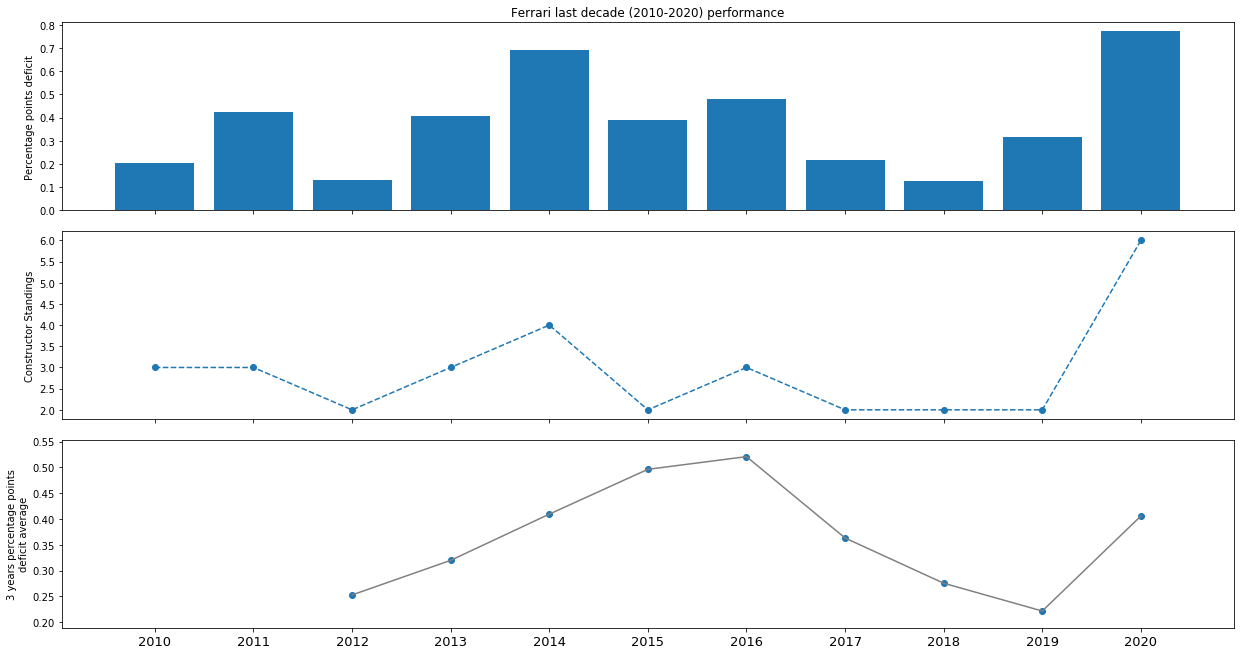

In [55]:
percent_deficit = []
years = result.year.unique()
for year in years:
    percent_deficit.append(-1*(result[result.year==year].points.pct_change().iloc[1]))
    

# Calculate moving average
numbers = percent_deficit.copy()
window_size = 3
i = 0
moving_averages = []

while i < len(numbers) - window_size + 1:
    this_window = numbers[i : i + window_size]
    window_average = sum(this_window) / window_size
    moving_averages.append(window_average)
    i += 1

fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1, figsize=(17,9), sharex=True)
fig.tight_layout()

ax1.bar(years, percent_deficit)
ax1.grid(False)

ax2.scatter(years, result[result.name=="Ferrari"].position.values)
ax2.plot(years, result[result.name=="Ferrari"].position.values, linestyle="--")
ax2.grid(False)

ax3.scatter(years[2:], moving_averages)
ax3.plot(years[2:], moving_averages, c="gray", label="3-years moving average")
ax3.grid(False)

ax1.set_ylabel("Percentage points deficit")
ax2.set_ylabel("Constructor Standings")
ax3.set_ylabel("3 years percentage points\ndeficit average")

ax1.set_title("Ferrari last decade (2010-2020) performance")
ax3.set_xticks(years)
ax3.set_xticklabels(years, fontsize=13);
plt.savefig('past_performance.svg')

In [57]:
query_statement = """
                select races.year, races.round, constructors.name, constructor_standings.points, season_winner.seasonWinner from races                
                join                
                    (                   
                        select last_race.year, constructors.name as seasonWinner from constructor_standings
                        join
                            (
                                select year, raceId from races
                                where year between 2010 and 2020
                                group by year
                                having max(round)
                            ) as last_race
                                on constructor_standings.raceId = last_race.raceId
                        join constructors
                            on constructors.constructorId = constructor_standings.constructorId
                        where constructor_standings.position=1                    
                    ) as season_winner                    
                        on races.year = season_winner.year                
                join constructor_standings
                    on constructor_standings.raceId = races.raceId                   
                join constructors
                    on constructors.constructorId = constructor_standings.constructorId                    
                where constructors.name = "Ferrari" or constructors.name = season_winner.seasonWinner                    
                order by races.year, races.round, constructor_standings.position
            """
result = read_query(query_statement, conn)

IndexError: index 11 is out of bounds for axis 0 with size 11

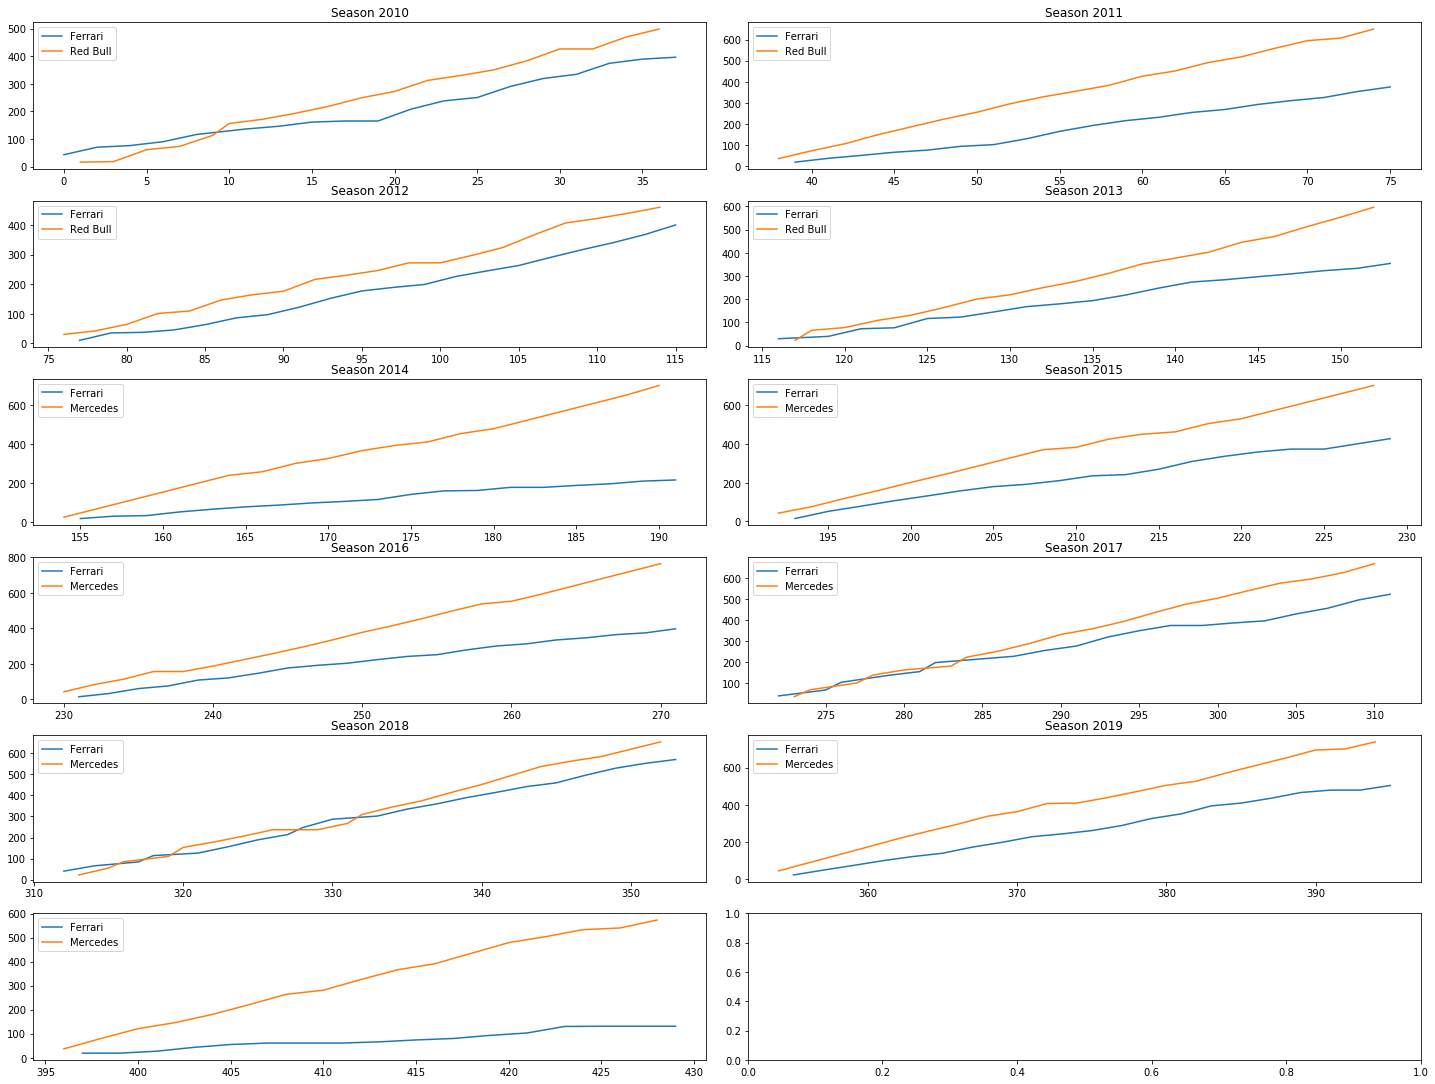

In [72]:
fig, ax = plt.subplots(figsize=(20,15), nrows=6, ncols=2)
fig.tight_layout()
years = result.year.unique()
for ind in range(0,len(years),2):
    ax_ind = ind//2
    result[result.year==years[ind]].groupby("name")["points"].plot(x="round", y="points", legend=True, ax=ax[ax_ind][0])
    result[result.year==years[ind+1]].groupby("name")["points"].plot(x="round", y="points", legend=True, ax=ax[ax_ind][1])
    
    ax[ax_ind][0].set_title(f"Season {years[ind]}")
    ax[ax_ind][1].set_title(f"Season {years[ind+1]}")
plt.savefig("diff_over_years.svg")

In [74]:
query_statement = """
                select                 
                    (
                        case
                            when races.year<2015 then "2010-2014"
                            else "2015-2020"
                        end
                    ) as "yearPartition",                
                    (
                        case
                            when status.status like "Finish%" or status.status like "+%" then "Completed"
                            else status.status
                        end
                    ) as resultType                
                from results                
                join races
                    on races.raceId = results.raceId                    
                join constructors
                    on constructors.constructorId = results.constructorId                    
                join status
                    on status.statusId = results.statusId                    
                where races.year between 2010 and 2020 and constructors.name = "Ferrari"               
            """
result = read_query(query_statement, conn)

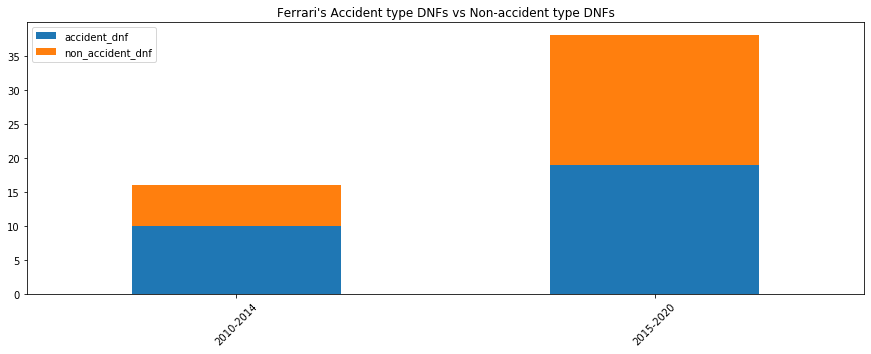

In [78]:
df = result[result.resultType!="Completed"].groupby("yearPartition").resultType.value_counts(sort=True, ascending=True).to_frame()
yearPartition = []
resultType = []
for year, cat in df.index:
    yearPartition.append(year)
    resultType.append(cat)
df.index = range(df.shape[0])
df.rename(columns={"resultType":"Counts"}, inplace=True)
df["yearPartition"] = yearPartition
df["resultType"] = resultType

df.resultType = df.resultType.apply(lambda val: "Accident" if val=="Accident" or val=="Collision" or val=="Collision damage" else val)


accident_dnf = [df[(df.yearPartition=="2010-2014") & (df.resultType=="Accident")].Counts.sum(),df[(df.yearPartition=="2015-2020") & (df.resultType=="Accident")].Counts.sum()]
non_accident_dnf = [df[(df.yearPartition=="2010-2014") & (df.resultType!="Accident")].Counts.sum(), df[(df.yearPartition=="2015-2020") & (df.resultType!="Accident")].Counts.sum()]

df = pd.DataFrame({"accident_dnf":accident_dnf, "non_accident_dnf":non_accident_dnf, "years":["2010-2014", "2015-2020"]})

fig, ax = plt.subplots(figsize=(15,5))
df[["accident_dnf","non_accident_dnf"]].plot(kind="bar", stacked=True, ax=ax)
ax.set_xticks(range(len(df.years.values.tolist())))
ax.set_xticklabels(df.years.values.tolist(), rotation=45)
ax.set_title("Ferrari's Accident type DNFs vs Non-accident type DNFs")
plt.savefig("accidents.svg")

In [79]:
query_statement = """
                select races.year, drivers.name,                
                    (
                        case
                            when status.status like "Finish%" or status.status like "+%" then "Completed"
                            else status.status
                        end
                    ) as resultType                
                from results                
                join constructors
                    on constructors.constructorId = results.constructorId                    
                join races
                    on races.raceId = results.raceId                    
                join drivers
                    on drivers.driverId = results.driverId                    
                join status
                    on status.statusId = results.statusId                    
                where constructors.name = "Ferrari" and (races.year between 2015 and 2020) and resultType!="Completed"                
                order by races.year
            """
result = read_query(query_statement, conn)

Text(0.5, 1.0, "Ferrari's DNF analysis by drivers")

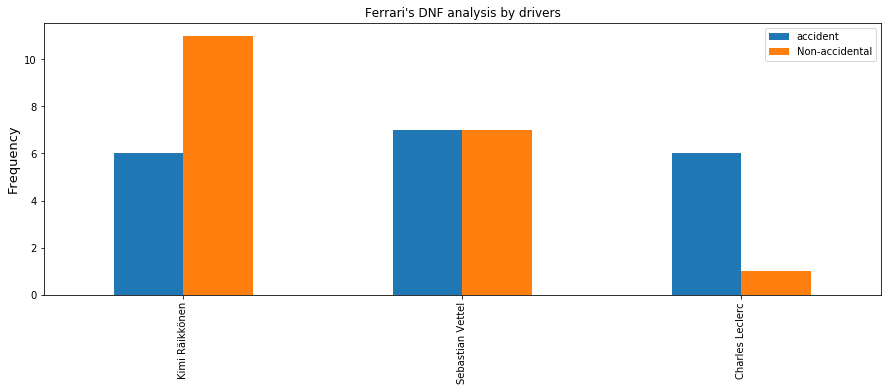

In [80]:
result.resultType = result.resultType.apply(lambda val: "Accident" if val=="Accident" or val=="Collision" or val=="Collision damage" else val)
result.resultType = result.resultType.apply(lambda val: "Non-accidental" if val!="Accident" else val)

non_accidental = []
accident = []
names = []

for driver in result.name.unique():
    driver_dict = result[result.name==driver].resultType.value_counts().to_dict()
    
    try:
        non_accidental.append(driver_dict["Non-accidental"])
    except:
        non_accidental.append(0)
    
    try:
        accident.append(driver_dict["Accident"])
    except:
        accident.append(0)
    
    names.append(driver)
    
fig, ax = plt.subplots(figsize=(15,5))
pd.DataFrame({"Name":names, "accident":accident, "Non-accidental":non_accidental}).plot(x="Name", kind="bar", ax=ax)
ax.set_xlabel("")
ax.set_ylabel("Frequency", fontsize=13)
ax.set_title("Ferrari's DNF analysis by drivers")

In [81]:
query_statement = """
                    select races.year, races.raceId, constructors.name team, drivers.name driver, sum(lap_times.milliseconds) total_lap_time,                     
                        (                        
                            case
                                when status.status not like "Finish%" and status.status not like "+%" then 1
                                else 0
                            end
                        ) Retired                    
                    from lap_times                    
                    join results
                        on results.raceId = lap_times.raceId and results.driverId = lap_times.driverId                    
                    join constructors
                        on constructors.constructorId = results.constructorId                        
                    join drivers
                        on drivers.driverId = results.driverId                        
                    join races
                        on races.raceId = results.raceId                        
                    join status
                        on status.statusId = results.statusId                        
                    join                    
                        (
                            select last_race.year, constructors.name as seasonWinner from constructor_standings
                            join
                                (
                                    select year, raceId from races
                                    where year between 2010 and 2020
                                    group by year
                                    having max(round)
                                ) as last_race
                                    on constructor_standings.raceId = last_race.raceId
                            join constructors
                                on constructors.constructorId = constructor_standings.constructorId
                            where constructor_standings.position=1
                        ) as season_winner                        
                            on season_winner.year = races.year                        
                    where (races.year between 2011 and 2020) and constructors.name in ("Ferrari", season_winner.seasonWinner)                    
                    group by races.year, races.raceId, drivers.name
            """
result_lap_time = read_query(query_statement, conn)

query_statement = """
                    select races.year, races.raceId, constructors.name team, drivers.name driver, sum(pit_stops.milliseconds) total_pit_stop_time from pit_stops                    
                    join results
                        on results.raceId = pit_stops.raceId and results.driverId = pit_stops.driverId                    
                    join constructors
                        on constructors.constructorId = results.constructorId                        
                    join drivers
                        on drivers.driverId = results.driverId                        
                    join races
                        on races.raceId = results.raceId                        
                    join                    
                        (
                            select last_race.year, constructors.name as seasonWinner from constructor_standings
                            join
                                (
                                    select year, raceId from races
                                    where year between 2010 and 2020
                                    group by year
                                    having max(round)
                                ) as last_race
                                    on constructor_standings.raceId = last_race.raceId
                            join constructors
                                on constructors.constructorId = constructor_standings.constructorId
                            where constructor_standings.position=1
                        ) as season_winner                        
                            on season_winner.year = races.year                        
                    where (races.year between 2011 and 2020) and constructors.name in ("Ferrari", season_winner.seasonWinner)                    
                    group by races.year, races.raceId, drivers.name
            """
result_pit_stop_time = read_query(query_statement, conn)

In [82]:
df = pd.merge(result_lap_time, result_pit_stop_time, on=["year", "raceId", "team", "driver"], how="left")

df["total_pit_stop_time"].fillna(0, inplace=True)

df = df[df["Retired"] != 1]

df["net_lap_time"] = df["total_lap_time"] - df["total_pit_stop_time"]

years = df["year"].unique()
raceId = df["raceId"].unique()

year_diff = {}
for year in years:
    
    lap_time_diff = []    
    for race in raceId:
        
        df_temp = df[(df["year"] == year) & (df["raceId"] == race)].reset_index(drop=True)
        n_rows = df_temp.shape[0]
        teams = df_temp["team"].unique()
        n_teams = len(teams)
        
        if n_rows in [0, 1]:
            continue
            
        elif n_rows == 2:
            if n_teams == 1:
                continue
            else:
                win_team_lap_time = df_temp[df_temp["team"] == win_team]["net_lap_time"].values[0]
                ferrari_lap_time = df_temp[df_temp["team"] == "Ferrari"]["net_lap_time"].values[0]
                
                val = win_team_lap_time - ferrari_lap_time
            
        elif n_rows == 3:
            win_team = [val for val in teams if val!="Ferrari"][0]
            win_team_cnt = df_temp[df_temp["team"] == win_team].shape[0]
            ferrari_cnt = df_temp[df_temp["team"] == "Ferrari"].shape[0]
            
            if ferrari_cnt > win_team_cnt:
                win_team_lap_time = df_temp[df_temp["team"] == win_team]["net_lap_time"].values[0]
                ferrari_lap_time = np.min(df_temp[df_temp["team"] == "Ferrari"]["net_lap_time"].values)
            
            else:
                win_team_lap_time = np.min(df_temp[df_temp["team"] == win_team]["net_lap_time"].values)
                ferrari_lap_time = df_temp[df_temp["team"] == "Ferrari"]["net_lap_time"].values[0]
                
            val = win_team_lap_time - ferrari_lap_time
            
        else:
            win_team = [val for val in teams if val!="Ferrari"][0]
            win_team_lap_time = np.sum(df_temp[df_temp["team"] == win_team]["net_lap_time"].values)
            ferrari_lap_time = np.sum(df_temp[df_temp["team"] == "Ferrari"]["net_lap_time"].values)
            
            val = win_team_lap_time - ferrari_lap_time
            
        lap_time_diff.append(val/1000)
        
    year_diff[year] = lap_time_diff

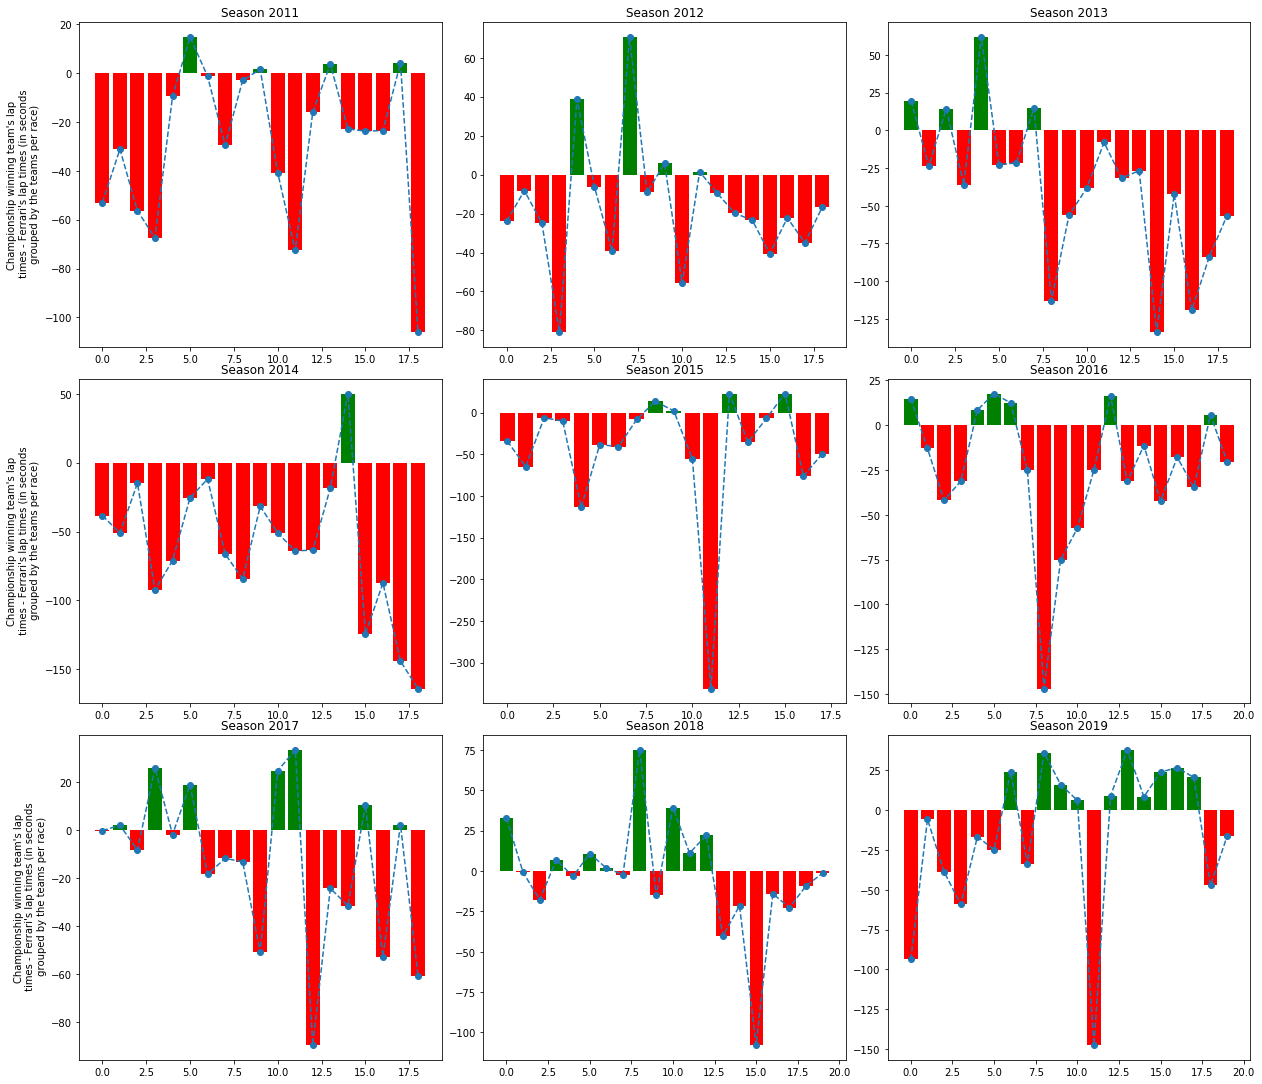

In [89]:
fig, ax0 = plt.subplots(figsize=(17,15), nrows=3, ncols=3)
fig.tight_layout()


for ind in range(0,len(years)-1,3):
    ax_ind = ind//3
    
    for add in range(3):
        year = years[ind+add]
        year_vals = year_diff[year]
        colors=['red' if val<0 else 'green' for val in year_vals]
        ax0[ax_ind][add].plot(year_vals, "--o")
        ax0[ax_ind][add].bar(range(len(year_vals)), year_vals, color=colors)
        ax0[ax_ind][add].set_title(f"Season {year}")
        ax0[ax_ind][add].grid(False)
                
        if add!=0:
            continue
            
        ax0[ax_ind][add].set_ylabel("Championship winning team's lap\n times - Ferrari's lap times (in seconds\n grouped by the teams per race)")
plt.savefig("lap_analysis.svg")